# Data fields:

## Data Dictionary:

Variable&emsp;&emsp;&emsp;&emsp;Definition&emsp;&emsp;&emsp;&emsp;Key  
survival&emsp;&emsp;&emsp;&emsp;Survival&emsp;&emsp;&emsp;&emsp;0 = No, 1 = Yes  
pclass&emsp;&emsp;&emsp;&emsp;Ticket class&emsp;&emsp;&emsp;&emsp;1 = 1st, 2 = 2nd, 3 = 3rd  
sex&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Sex  	
Age&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Age&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;in years  	
sibsp&emsp;&emsp;&emsp;# of siblings / spouses aboard the Titanic  
parch&emsp;&emsp;&emsp;# of parents / children aboard the Titanic  
ticket&emsp;&emsp;&emsp;&emsp;&emsp;Ticket number  
fare&emsp;&emsp;&emsp;&emsp;&emsp;Passenger fare  
cabin&emsp;&emsp;&emsp;&emsp;&emsp;Cabin number  	
embarked&emsp;&emsp;&emsp;Port of Embarkation&emsp;&emsp;C = Cherbourg, Q = Queenstown, S = Southampton  

## Variable Notes:

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.


In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifier, RidgeClassifierCV, SGDClassifier, Perceptron
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier

%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# -----------------------------------------------------------------------------------------------------

# Importation Dataset

# -----------------------------------------------------------------------------------------------------

In [2]:
base_path = os.path.join('../input/train.csv')
base_path

'../input/train.csv'

In [3]:
df = pd.read_csv(base_path)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**It seems there are NaN values in Age and Embarked columns.**

# -----------------------------------------------------------------------------------------------------

# Cleaning

# -----------------------------------------------------------------------------------------------------

## Use PassengerID column like index

In [7]:
df = df.set_index(df['PassengerId'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Remove PassengerId column

In [8]:
df = df.drop(labels='PassengerId', axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Complete missing age with median

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**It's OK for the Age feature.**

## Complete embarked with mode

In [11]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**It's OK for the Embarked feature.**

## Remove Ticket column

In [13]:
df = df.drop(labels='Ticket', axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


## Remove Cabin column

In [14]:
df = df.drop(labels='Cabin', axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


# -----------------------------------------------------------------------------------------------------

# Features Engineering

# -----------------------------------------------------------------------------------------------------

**We'll apply OHE when the categorical feature is not ordinal (dog,cat,mouse) OR get_dummies with Pandas.  
We'll apply Label encoding when the categorical feature is ordinal (Jr. kg, Sr. kg, Primary school, high school ,etc) OR astype('category') with Pandas.**

## Dummies Sex Feature

In [15]:
sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')
sex_dummies.head()

,Sex_female,Sex_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [16]:
df = pd.concat([df, sex_dummies], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1


## Dummies Embarked Feature

In [17]:
emb_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
emb_dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [18]:
df = pd.concat([df, emb_dummies], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1,0,0,1


## Title_name Feature from Name column

In [19]:
df['Title_name'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_name
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1,0,0,1,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,1,0,0,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,0,0,0,1,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,0,0,1,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1,0,0,1,Mr


In [20]:
df = df.drop(labels='Name', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_name
PassengerId,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,Mr
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,Mrs
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,Miss
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,Mrs
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,Mr


## Encoding Title_name feature

In [21]:
title_min = 10
title_names = (df['Title_name'].value_counts() < title_min)
df['Title_name'] = df['Title_name'].apply(lambda x: 'Others' if title_names.loc[x] == True else x)
print(df['Title_name'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title_name, dtype: int64


**We'll keep only the titles: Mr, Miss, Mrs, Master. All the others will be classified like 'Others'.**

In [22]:
title_dummies = pd.get_dummies(df['Title_name'], prefix='Title')
title_dummies.head()

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
PassengerId,,,,,
1,0,0,1,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0
5,0,0,1,0,0


In [23]:
df = pd.concat([df, title_dummies], axis=1)
df = df.drop(labels='Title_name', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1,0,0
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,0,1,0
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,1,0,0,0
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,0,0,0,1,0
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1,0,0


## FamilySize Feature with SibSp + Parch columns

**We'll create a new column 'FamilySize', the addition of SibSp and Parch features.**

In [24]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,FamilySize
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1,0,0,2
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,0,1,0,2
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,1,0,0,0,1
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,0,0,0,1,0,2
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1,0,0,1


## IsSingle Feature

**We'll create a new column 'IsSingle' for single person on board.**

In [25]:
df['IsSingle'] = 1
df['IsSingle'].loc[df['FamilySize'] > 1] = 0
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,FamilySize,IsSingle
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1,0,0,2,0
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,0,1,0,2,0
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,1,0,0,0,1,1
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,0,0,0,1,0,2,0
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1,0,0,1,1


## FareQuant Feature from Fare column

**We'll create a new column 'FareQuant', the different quartiles of the Fare feature.**

In [26]:
df['FareQuant'] = pd.qcut(df['Fare'], 4)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,FamilySize,IsSingle,FareQuant
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1,0,0,2,0,"(-0.001, 7.91]"
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,0,1,0,2,0,"(31.0, 512.329]"
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,1,0,0,0,1,1,"(7.91, 14.454]"
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,0,0,0,1,0,2,0,"(31.0, 512.329]"
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1,0,0,1,1,"(7.91, 14.454]"


In [27]:
df['FareQuant_Code'] = df['FareQuant'].astype('category').cat.codes
df = df.drop(labels='FareQuant', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,FamilySize,IsSingle,FareQuant_Code
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1,0,0,2,0,0
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,0,1,0,2,0,3
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,1,0,0,0,1,1,1
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,0,0,0,1,0,2,0,3
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1,0,0,1,1,1


## AgeRange Feature from Age column

**We'll create a new column 'AgeRange', bin values into 5 discrete intervals.**

In [28]:
df['AgeRange'] = pd.cut(df['Age'].astype(int), 5)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,FamilySize,IsSingle,FareQuant_Code,AgeRange
PassengerId,,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1,0,0,2,0,0,"(16.0, 32.0]"
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,0,1,0,2,0,3,"(32.0, 48.0]"
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,1,0,0,0,1,1,1,"(16.0, 32.0]"
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,0,0,0,1,0,2,0,3,"(32.0, 48.0]"
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1,0,0,1,1,1,"(32.0, 48.0]"


In [29]:
df['AgeRange_Code'] = df['AgeRange'].astype('category').cat.codes
df = df.drop(labels='AgeRange', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,FamilySize,IsSingle,FareQuant_Code,AgeRange_Code
PassengerId,,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1,0,0,2,0,0,1
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,0,1,0,2,0,3,2
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,1,0,0,0,1,1,1,1
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,0,0,0,1,0,2,0,3,2
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1,0,0,1,1,1,2


# -----------------------------------------------------------------------------------------------------

# EDA

# -----------------------------------------------------------------------------------------------------

## Heatmap

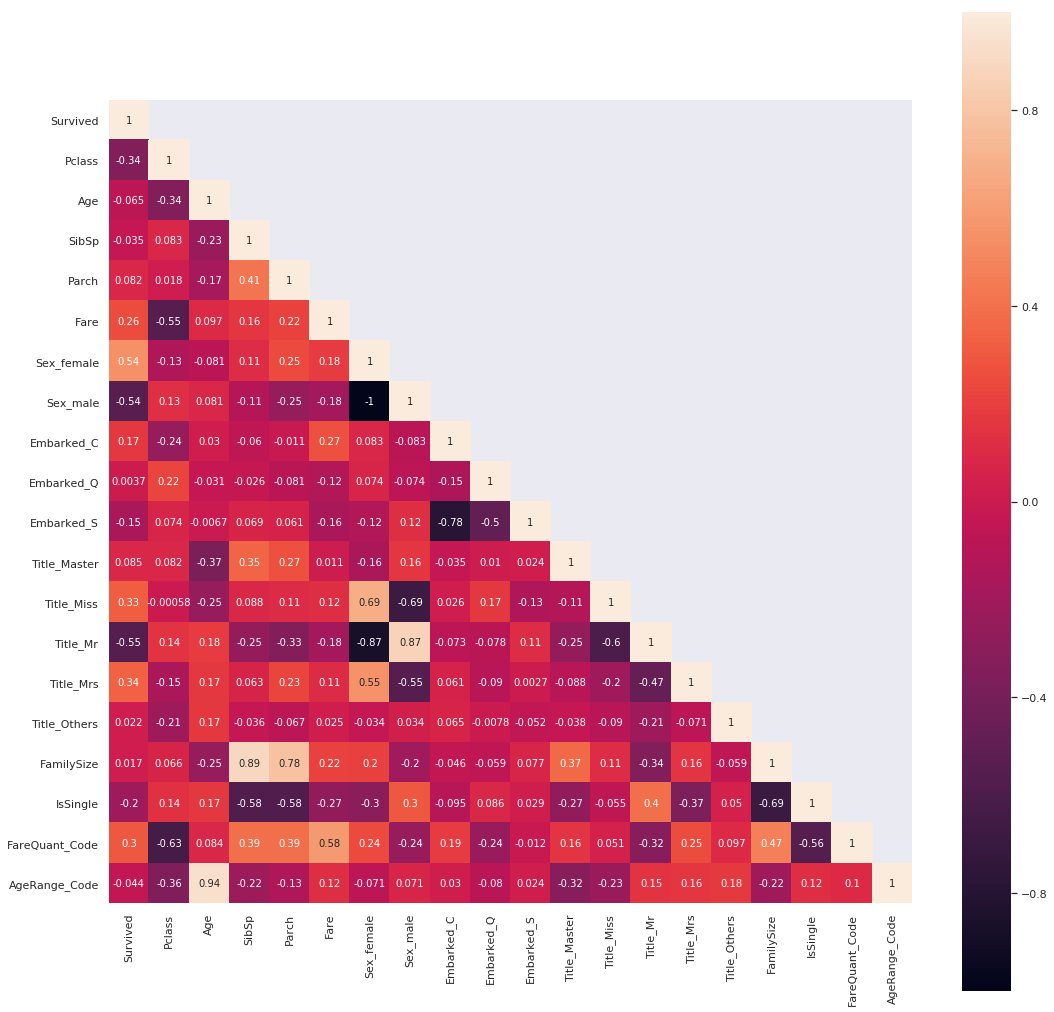

In [30]:
cor_mat = df[:].corr(method='pearson')
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(18, 18)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True);

## Correlations and chi2 with Survived feature

In [31]:
lst = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others', 'FamilySize', 'IsSingle', 'FareQuant_Code', 'AgeRange_Code']

In [32]:
for col in lst:
    if col != 'Survived':
        print('Survival Correlation by {}:'.format(col))
        print(df[[col, 'Survived']].groupby(col, as_index=False).mean())
        print('\nchi2_contingency:')
        cross_table = pd.crosstab(df['Survived'], df[col])
        _, p_val, _, _ = stats.chi2_contingency(cross_table)
        print('p_value: {}\n'.format(p_val))
        print(10 * '*')

Survival Correlation by Pclass:
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

chi2_contingency:
p_value: 4.549251711298793e-23

**********
Survival Correlation by Sex:
      Sex  Survived
0  female  0.742038
1    male  0.188908

chi2_contingency:
p_value: 1.1973570627755645e-58

**********
Survival Correlation by SibSp:
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

chi2_contingency:
p_value: 1.5585810465902116e-06

**********
Survival Correlation by Parch:
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000

chi2_contingency:
p_value: 9.703526421039997e-05

**********
Survival Correlation by Embarked:
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009

chi2_contingency:
p_value: 2.3008626481449577e-06

**********
Su

# Univariate Analysis

## Distributions

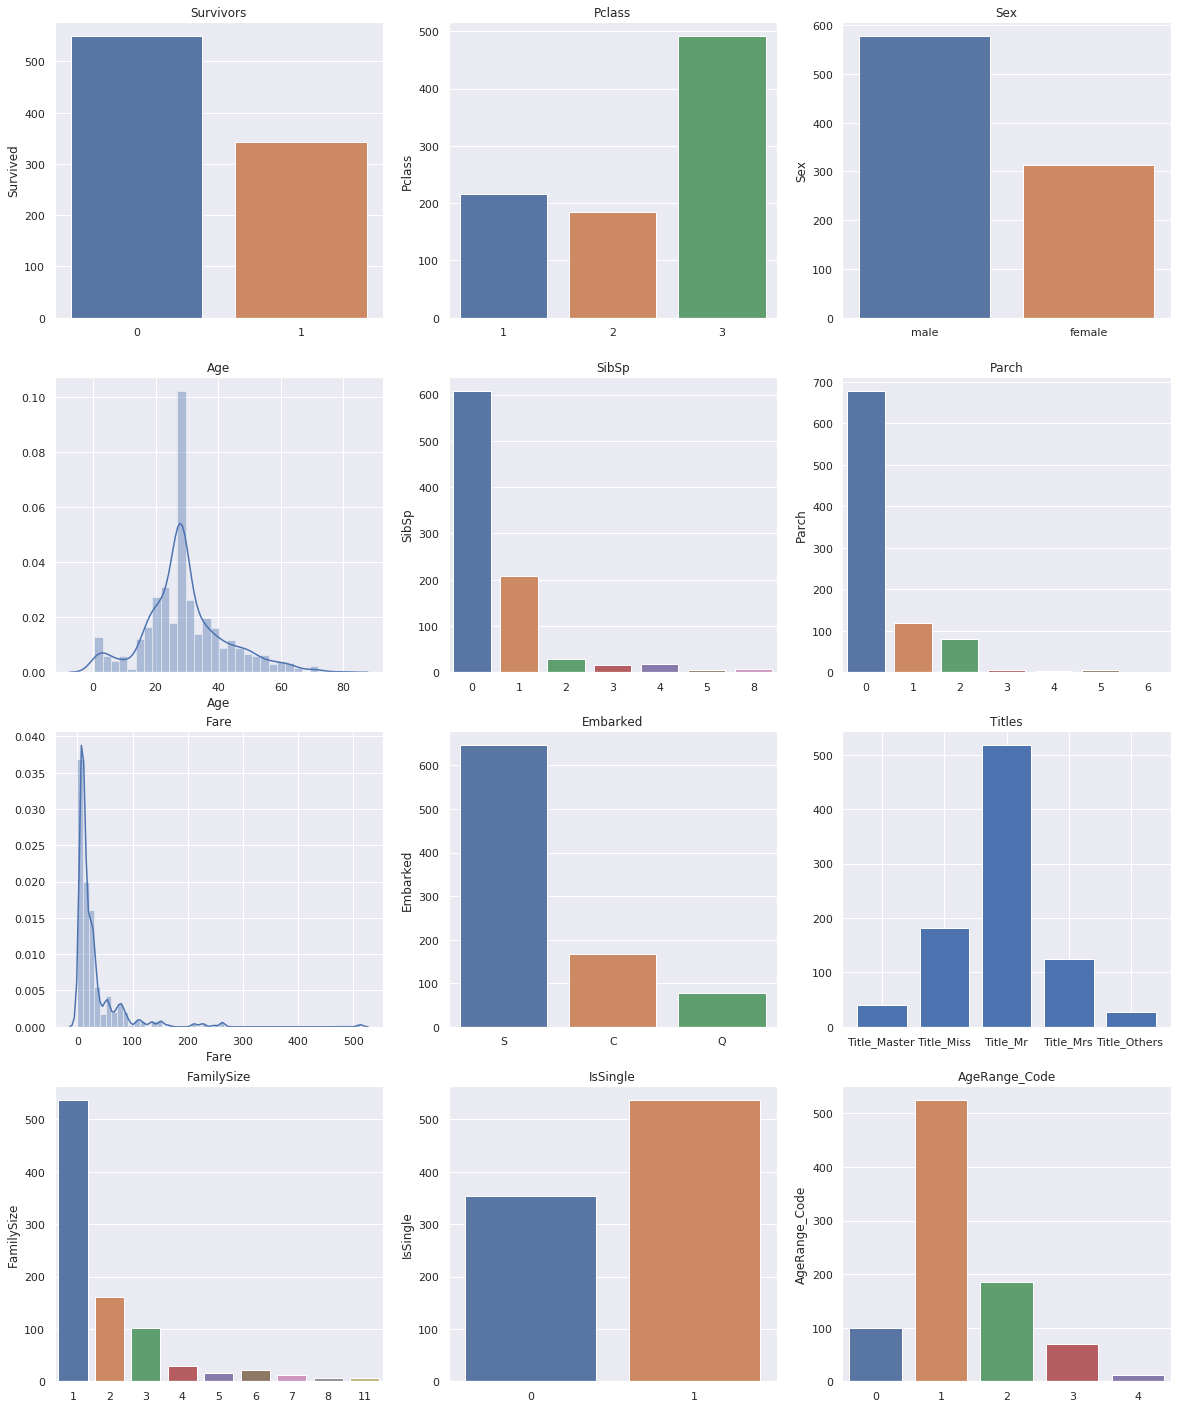

In [33]:
fig, _ = plt.subplots(figsize=(20, 25))

plt.subplot(4, 3, 1)
sns.barplot(x=df['Survived'].unique(), y=df['Survived'].value_counts())
plt.title('Survivors')

plt.subplot(4, 3, 2)
sns.barplot(x=df['Pclass'].unique(), y=df['Pclass'].value_counts())
plt.title('Pclass')

plt.subplot(4, 3, 3)
sns.barplot(x=df['Sex'].unique(), y=df['Sex'].value_counts())
plt.title('Sex');

plt.subplot(4, 3, 4)
sns.distplot(df['Age'])
plt.title('Age')

plt.subplot(4, 3, 5)
sns.barplot(x=df['SibSp'].value_counts().index, y=df['SibSp'].value_counts())
plt.title('SibSp')

plt.subplot(4, 3, 6)
sns.barplot(x=df['Parch'].value_counts().index, y=df['Parch'].value_counts())
plt.title('Parch')

plt.subplot(4, 3, 7)
sns.distplot(df['Fare'])
plt.title('Fare')

plt.subplot(4, 3, 8)
sns.barplot(x=df['Embarked'].value_counts().index, y=df['Embarked'].value_counts())
plt.title('Embarked')

plt.subplot(4, 3, 9)
Title_Master = df['Title_Master'][df['Title_Master'] == 1].count()
Title_Miss = df['Title_Miss'][df['Title_Miss'] == 1].count()
Title_Mr = df['Title_Mr'][df['Title_Mr'] == 1].count()
Title_Mrs = df['Title_Mrs'][df['Title_Mrs'] == 1].count()
Title_Others = df['Title_Others'][df['Title_Others'] == 1].count()
heights = [Title_Master, Title_Miss, Title_Mr, Title_Mrs, Title_Others]
names = ['Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others']
plt.bar(names, heights)
plt.title('Titles')

plt.subplot(4, 3, 10)
sns.barplot(x=df['FamilySize'].value_counts().index, y=df['FamilySize'].value_counts());
plt.title('FamilySize')

plt.subplot(4, 3, 11)
sns.barplot(x=df['IsSingle'].value_counts().index, y=df['IsSingle'].value_counts());
plt.title('IsSingle')

plt.subplot(4, 3, 12)
sns.barplot(x=df['AgeRange_Code'].value_counts().index, y=df['AgeRange_Code'].value_counts());
plt.title('AgeRange_Code')

plt.show()

## Comments

- Deads vs survivors: 62% vs 38%
- Class_1, 2 and 3: 24%, 21% and 55%
- Mens vs women: 65% vs 35%
- Age: High representation around 30 but it seems to be a normal distribution
- SibSp_0, 1, 2, 3, 4, 5 and 8: 68%, 23%, 3%, 2%, 2%, 1% and 1%
- Parch_0, 1, 2, 3, 4, 5 and 6: 76%, 13%, 9%, 1%, 0%, 1% and 0%
- Fare: 75% of fare under 31\$
- Embarked_S, C and Q: 73%, 19% and 9%
- Family_size_1, 2, 3, 4, 5, 6, 7, 8 and 11: 60%, 18%, 11%, 3%, 2%, 2%, 1%, 1% and 1%

# Multivariate Analysis

## Survived vs others features

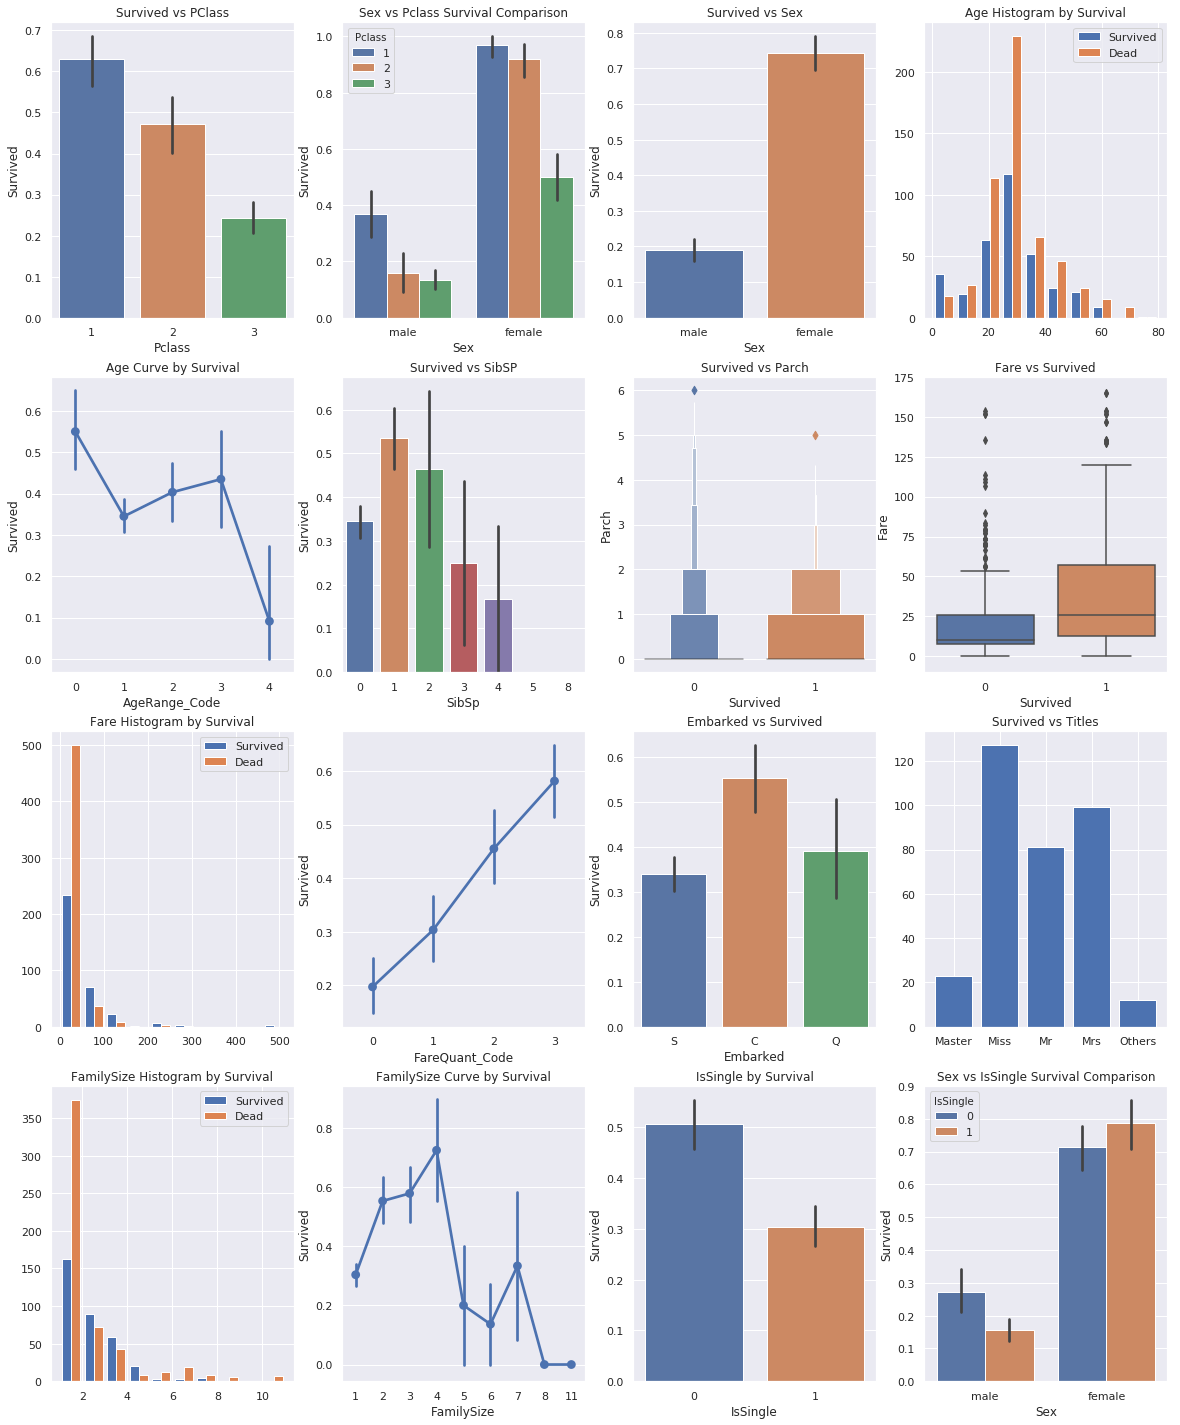

In [34]:
fig, _ = plt.subplots(figsize=(20, 25))

plt.subplot(4, 4, 1)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survived vs PClass')

plt.subplot(4, 4, 2)
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df)
plt.title('Sex vs Pclass Survival Comparison')

plt.subplot(4, 4, 3)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survived vs Sex')

plt.subplot(4, 4, 4)
plt.hist(x=[df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']], label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.legend()

plt.subplot(4, 4, 5)
sns.pointplot(x='AgeRange_Code', y='Survived',  data=df)
plt.title('Age Curve by Survival')

plt.subplot(4, 4, 6)
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survived vs SibSP')

plt.subplot(4, 4, 7)
sns.boxenplot(x=df['Survived'], y=df['Parch'])
plt.title('Survived vs Parch')

plt.subplot(4, 4, 8)
ax = sns.boxplot(x=df['Survived'], y=df['Fare'])
ax.set(ylim=(-10, 175))
plt.title('Fare vs Survived')

plt.subplot(4, 4, 9)
plt.hist(x=[df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare']], label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.legend()

plt.subplot(4, 4, 10)
sns.pointplot(x='FareQuant_Code', y='Survived',  data=df)

plt.subplot(4, 4, 11)
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Embarked vs Survived')

plt.subplot(4, 4, 12)
Title_Master_survived = df['Title_Master'][df['Title_Master'] == 1][df['Survived'] == 1].count()
Title_Miss_survived = df['Title_Miss'][df['Title_Miss'] == 1][df['Survived'] == 1].count()
Title_Mr_survived = df['Title_Mr'][df['Title_Mr'] == 1][df['Survived'] == 1].count()
Title_Mrs_survived = df['Title_Mrs'][df['Title_Mrs'] == 1][df['Survived'] == 1].count()
Title_Others_survived = df['Title_Others'][df['Title_Others'] == 1][df['Survived'] == 1].count()
heights = [Title_Master_survived, Title_Miss_survived, Title_Mr_survived, Title_Mrs_survived, Title_Others_survived]
names = ['Master', 'Miss', 'Mr', 'Mrs', 'Others']
plt.bar(names, heights)
plt.title('Survived vs Titles')

plt.subplot(4, 4, 13)
plt.hist(x=[df[df['Survived'] == 1]['FamilySize'], df[df['Survived'] == 0]['FamilySize']], label=['Survived','Dead'])
plt.title('FamilySize Histogram by Survival')
plt.legend()

plt.subplot(4, 4, 14)
sns.pointplot(x='FamilySize', y='Survived', data=df)
plt.title('FamilySize Curve by Survival')

plt.subplot(4, 4, 15)
sns.barplot(x='IsSingle', y='Survived', data=df)
plt.title('IsSingle by Survival')

plt.subplot(4, 4, 16)
sns.barplot(x='Sex', y='Survived', hue='IsSingle', data=df)
plt.title('Sex vs IsSingle Survival Comparison')

plt.show()

## Comments

- Survived & Pclass: The survival rate decrease with the Pclass and it's better for women in particular for the first two classes
- Survived & Sex features: Women had a better survival rate than men  
- Survived & Age: The survival rate is better for the very young people and it decreases after 30
- Survived & SibSp: The survival rate is better with 1 SibSp and it decreases until 4
- Survived & Parch: People most survived had between 0 and 2 Parch
- Survived & Fare: People who paid high fare had more chances to survive
- Survived & Embarked: People who embarked in C had better chances to survive than S or Q
- Survived & Titles: Best survival rates for Miss and Mrs
- Survived & FamilySize: The survival rate is better for familisize between 2 and 4
- Survived & IsSingle: More single people who died and the survival rate is better for single women on the other hand this rate is worst for men

# -----------------------------------------------------------------------------------------------------

# Machine Learning - Supervised learning

# -----------------------------------------------------------------------------------------------------

In [35]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,FamilySize,IsSingle,FareQuant_Code,AgeRange_Code
PassengerId,,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1,0,0,2,0,0,1
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,0,1,0,2,0,3,2
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,1,0,0,0,1,1,1,1
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,0,0,0,1,0,2,0,3,2
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1,0,0,1,1,1,2


In [40]:
cols_to_drop = ['Sex', 'Embarked']
df = df.drop(labels=cols_to_drop, axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,FamilySize,IsSingle,FareQuant_Code,AgeRange_Code
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,2,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,1,0,2,0,3,2
3,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,1,0,0,0,1,1,1,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,1,0,2,0,3,2
5,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,1,1,1,2


In [41]:
X = df.loc[:, df.columns != 'Survived']
y = df['Survived']

In [42]:
X.shape, y.shape

((891, 19), (891,))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((623, 19), (623,), (268, 19), (268,))

## Best model:

In [45]:
pipelines = [
('KNeighborsClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])),
('SVC', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('SVC', SVC(random_state=42))])),
('LogisticRegression', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LR', LogisticRegression(random_state=42))])),
('RandomForestClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('RF', RandomForestClassifier(random_state=42))])),
('XGBClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('XBGC', XGBClassifier(random_state=42))])),
('AdaBoostClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('ABC', AdaBoostClassifier(random_state=42))])),
('BaggingClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('BC', BaggingClassifier(random_state=42))])),
('ExtraTreesClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('ETC', ExtraTreesClassifier(random_state=42))])),
('GradientBoostingClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('GBC', GradientBoostingClassifier(random_state=42))])),
('LogisticRegressionCV', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LRCV', LogisticRegressionCV(random_state=42))])),
('PassiveAggressiveClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('PAC', PassiveAggressiveClassifier(random_state=42))])),
('RidgeClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('RC', RidgeClassifier(random_state=42))])),
('RidgeClassifierCV', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('RCCV', RidgeClassifierCV())])),
('SGDClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('SGDC', SGDClassifier(random_state=42))])),
('LinearSVC', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LSVC', LinearSVC(random_state=42))])),
('NuSVC', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('NSVC', NuSVC(random_state=42))])),
('DecisionTreeClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('DTC', DecisionTreeClassifier(random_state=42))])),
('ExtraTreeClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('ETC', ExtraTreeClassifier(random_state=42))])),
('GaussianProcessClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('GPC', GaussianProcessClassifier(random_state=42))])),
('Perceptron', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('P', Perceptron(random_state=42))])),
('BernoulliNB', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('BNB', BernoulliNB())])),
('GaussianNB', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('GNB', GaussianNB())])),
('LinearDiscriminantAnalysis', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])),
('QuadraticDiscriminantAnalysis', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('QDA', QuadraticDiscriminantAnalysis())]))
]

df_models_cols = ['Name', 'Train_Acc_Mean', 'Test_Acc_Mean', 'Test_Acc_3*STD']

models_comparison = pd.DataFrame(columns=df_models_cols)

In [46]:
skf = StratifiedKFold(n_splits=5, random_state=42)

row = 0

for name, model in pipelines:
    models_comparison.loc[row, 'Name'] = name
    cv_results = cross_validate(model, X_train, y_train, cv=skf, scoring='accuracy')
    models_comparison.loc[row, 'Train_Acc_Mean'] = cv_results['train_score'].mean()
    models_comparison.loc[row, 'Test_Acc_Mean'] = cv_results['test_score'].mean()
    models_comparison.loc[row, 'Test_Acc_3*STD'] = cv_results['test_score'].std() * 3
    model.fit(X_train, y_train)
    row += 1

models_comparison.sort_values(by=['Test_Acc_Mean'], ascending=False, inplace=True)
models_comparison

,Name,Train_Acc_Mean,Test_Acc_Mean,Test_Acc_3*STD
9,LogisticRegressionCV,0.856349,0.831466,0.104067
0,KNeighborsClassifier,0.864367,0.828292,0.0861791
1,SVC,0.847916,0.826627,0.0871738
12,RidgeClassifierCV,0.86998,0.82344,0.122279
4,XGBClassifier,0.92176,0.823299,0.124564
2,LogisticRegression,0.878008,0.818588,0.115749
15,NuSVC,0.841496,0.813775,0.111637
11,RidgeClassifier,0.877202,0.810537,0.114203
8,GradientBoostingClassifier,0.941018,0.80726,0.109667
21,GaussianNB,0.823035,0.805762,0.168241


In [47]:
best_model_name = models_comparison.iloc[0, 0]
Test_Acc_Mean = models_comparison.iloc[0, 2]
print('Best model: {} \nTest_Acc_Mean: {}'.format(best_model_name, Test_Acc_Mean))

Best model: LogisticRegressionCV 
Test_Acc_Mean: 0.8314658474142347


In [51]:
param_grid = {
    'LRCV__Cs': np.arange(1, 11, 1)
}

pipe = Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LRCV', LogisticRegressionCV(scoring='accuracy', random_state=42))])

gs = GridSearchCV(pipe, param_grid, cv=skf)

gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LRCV', LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=T...=42,
           refit=True, scoring='accuracy', solver='lbfgs', tol=0.0001,
           verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'LRCV__Cs': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
print("best score: {}".format(gs.best_score_))
print("best params: {}".format(gs.best_params_))

best score: 0.8346709470304976
best params: {'LRCV__Cs': 5}


In [53]:
best_model = gs.best_estimator_
best_model

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LRCV', LogisticRegressionCV(Cs=5, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
           refit=True, scoring='accuracy', solver='lbfgs', tol=0.0001,
           verbose=0))])

In [54]:
best_model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LRCV', LogisticRegressionCV(Cs=5, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
           refit=True, scoring='accuracy', solver='lbfgs', tol=0.0001,
           verbose=0))])

In [55]:
best_model.score(X_train, y_train)

0.8459069020866774

In [56]:
best_model.score(X_test, y_test)

0.8208955223880597

# ------------------------------------------------------------------------
# --------------------------------TEST---------------------------------
# ------------------------------------------------------------------------

In [57]:
def clean_df(df):
    df = df.set_index(df['PassengerId'])
    df = df.drop(labels='PassengerId', axis=1)
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df = df.drop(labels='Ticket', axis=1)
    df = df.drop(labels='Cabin', axis=1)
    sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')
    df = pd.concat([df, sex_dummies], axis=1)
    df = df.drop(labels='Sex', axis=1)
    emb_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
    df = pd.concat([df, emb_dummies], axis=1)
    df = df.drop(labels='Embarked', axis=1)
    df['Title_name'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    title_names = (df['Title_name'].value_counts() < 10)
    df['Title_name'] = df['Title_name'].apply(lambda x: 'Others' if title_names.loc[x] == True else x)
    df = df.drop(labels='Name', axis=1)
    title_dummies = pd.get_dummies(df['Title_name'], prefix='Title')
    df = pd.concat([df, title_dummies], axis=1)
    df = df.drop(labels='Title_name', axis=1)
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsSingle'] = 1
    df['IsSingle'].loc[df['FamilySize'] > 1] = 0
    df['FareQuant'] = pd.qcut(df['Fare'], 4)
    df['FareQuant_Code'] = df['FareQuant'].astype('category').cat.codes
    df = df.drop(labels='FareQuant', axis=1)
    df['AgeRange'] = pd.cut(df['Age'].astype(int), 5)
    df['AgeRange_Code'] = df['AgeRange'].astype('category').cat.codes
    df = df.drop(labels='AgeRange', axis=1)
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    return df

In [58]:
base_path = os.path.join('../input/test.csv')
base_path

'../input/test.csv'

In [59]:
df_test = pd.read_csv(os.path.join(base_path))

In [60]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [62]:
df_test.shape

(418, 11)

In [63]:
df_test = clean_df(df_test)
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,FamilySize,IsSingle,FareQuant_Code,AgeRange_Code
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,34.5,0,0,7.8292,0,1,0,1,0,0,0,1,0,0,1,1,0,2
893,3,47.0,1,0,7.0000,1,0,0,0,1,0,0,0,1,0,2,0,0,3
894,2,62.0,0,0,9.6875,0,1,0,1,0,0,0,1,0,0,1,1,1,4
895,3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1,0,0,1,1,1,1
896,3,22.0,1,1,12.2875,1,0,0,0,1,0,0,0,1,0,3,0,1,1


In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 19 columns):
Pclass            418 non-null int64
Age               418 non-null float64
SibSp             418 non-null int64
Parch             418 non-null int64
Fare              418 non-null float64
Sex_female        418 non-null uint8
Sex_male          418 non-null uint8
Embarked_C        418 non-null uint8
Embarked_Q        418 non-null uint8
Embarked_S        418 non-null uint8
Title_Master      418 non-null uint8
Title_Miss        418 non-null uint8
Title_Mr          418 non-null uint8
Title_Mrs         418 non-null uint8
Title_Others      418 non-null uint8
FamilySize        418 non-null int64
IsSingle          418 non-null int64
FareQuant_Code    418 non-null int8
AgeRange_Code     418 non-null int8
dtypes: float64(2), int64(5), int8(2), uint8(10)
memory usage: 31.0 KB


In [65]:
X_train.shape, y_train.shape, df_test.shape

((623, 19), (623,), (418, 19))

In [66]:
model = LogisticRegressionCV(scoring='accuracy', random_state=42, Cs=5)

pipe = Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LRCV', model)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(df_test)

y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [67]:
df_sample_submission = pd.DataFrame({'PassengerId': df_test.index, 'Survived': y_pred})

In [68]:
sample_submission = pd.DataFrame.to_csv(df_sample_submission, index=False)
with open ('../submissions/sample_submission.csv', 'w') as f:
    f.write(sample_submission)

# Score: 0.79425

# My place: 2511 / 10634

# Top 100: 0.80382